# Experiment 1
Variable Batch Time Out

This for Varied transaction rates. Batch Time out 2s.
Experiment 1.1 One Trasaction per 5 second 

In [13]:
from time import sleep
def create_peer_invoke_command():
    base = "docker exec -it cli peer chaincode invoke -o orderer.organ.com:7050 --tls true --cafile /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/ordererOrganizations/organ.com/orderers/orderer.organ.com/msp/tlscacerts/tlsca.organ.com-cert.pem -C organ-channel -n organcc "
    return(base)

def add_peers(org='hl', peer_n=0):
    hl_p1_add = ' --peerAddresses peer1.histocompatibility.organ.com:7051 '
    hl_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer1.histocompatibility.organ.com/tls/ca.crt '
    hl_p0_add = ' --peerAddresses peer0.histocompatibility.organ.com:7051 '
    hl_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/histocompatibility.organ.com/peers/peer0.histocompatibility.organ.com/tls/ca.crt '
    
    ho_p1_add = ' --peerAddresses peer1.hospital.organ.com:7051 '
    ho_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer1.hospital.organ.com/tls/ca.crt  '
    ho_p0_add = ' --peerAddresses peer0.hospital.organ.com:7051 '
    ho_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/hospital.organ.com/peers/peer0.hospital.organ.com/tls/ca.crt  '
    
    gp_p1_add = ' --peerAddresses peer1.gp.organ.com:7051 '
    gp_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer1.gp.organ.com/tls/ca.crt  '
    gp_p0_add = ' --peerAddresses peer0.gp.organ.com:7051 '
    gp_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/gp.organ.com/peers/peer0.gp.organ.com/tls/ca.crt  '
    
    op_p1_add = ' --peerAddresses peer1.opo.organ.com:7051 '
    op_p1_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer1.opo.organ.com/tls/ca.crt  '
    op_p0_add = ' --peerAddresses peer0.opo.organ.com:7051 '
    op_p0_cert = ' --tlsRootCertFiles /opt/gopath/src/github.com/hyperledger/fabric/peer/crypto/peerOrganizations/opo.organ.com/peers/peer0.opo.organ.com/tls/ca.crt  '
    cmd = ""
    cmd += create_peer_invoke_command() + hl_p1_add + hl_p1_cert
    cmd += hl_p0_add + hl_p0_cert
    cmd += ho_p0_add + ho_p0_cert + ho_p1_add + ho_p1_cert
    cmd += gp_p0_add + gp_p0_cert + gp_p1_add + gp_p1_cert
    cmd += op_p0_add + op_p0_cert + op_p1_add + op_p1_cert
    return(cmd)

def add_organ(organ_id = '', organ_name='', organ_data=''):
    cmd = add_peers() + '-c '
    
    cmd += '\'{"Args":["initOrgan", "' + str(organ_id) + '", "' + str(organ_name) + '", ' + str(organ_data) + ']}\''
    return(cmd)

def read_organ(organ_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readOrgan",\"' + str(organ_id) + '\"]}\''
    return(cmd)

def add_candidate(candidate_id = '', organ_name='', info=''):
    cmd = add_peers() + '-c '
    cmd += '\'{"Args":["initCandidate", "' + candidate_id + '", "' + organ_name + '", ' + info + ']}\''
    return(cmd)

def read_candidate(candidate_id='421'):
    cmd = add_peers()
    cmd +=  '-c \'{\"Args\":[\"readCandidate",\"' + str(candidate_id) + '\"]}\''
    return(cmd)

def docker_cleanup():
    !{ "docker rm -f $(docker ps -aq)"}
    !{ "docker volume prune -f"}
    !{ "docker network prune -f"}
    docker_images = "docker images --format '{{.Repository}}'"
    images = !{docker_images}
    dev_images=[]
    for image in images:
        if(image.find('dev-', 0, 6)>=0):
            dev_images.append(image)
    docker_rmi = "docker rmi -f "+" ".join(dev_images)
    print(docker_rmi)
    !{docker_rmi}

In [14]:
with open(r"/home/thesis/Downloads/data_1.json", 'r') as file:
    data_1 = file.read()
with open(r"/home/thesis/Downloads/data_2.json", 'r') as file:
    data_2 = file.read()
with open(r"/home/thesis/Downloads/data_3.json", 'r') as file:
    data_3 = file.read()
with open(r"/home/thesis/Downloads/data_4.json", 'r') as file:
    data_4 = file.read()
import json
data = []
data.append(json.dumps(data_1))
data.append(json.dumps(data_2))
data.append(json.dumps(data_3))
data.append(json.dumps(data_4))

In [19]:
for i in range(15):
    cmd = add_candidate(str(i+8000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = add_organ(str(i+4000), "Intestine", data[i%4])
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_candidate(str(i+8000))
    ! {cmd}
    sleep(5)
    
for i in range(15):
    cmd = read_organ(str(i+4000))
    ! {cmd}
    sleep(5)

2019-04-19 16:26:29.863 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 
2019-04-19 16:26:35.493 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 
2019-04-19 16:26:41.186 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 
2019-04-19 16:26:46.867 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 
2019-04-19 16:26:52.517 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 
2019-04-19 16:26:58.159 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 
2019-04-19 16:27:03.798 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 
2019-04-19 16:27:09.451 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. resu

2019-04-19 16:29:27.363 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8001\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-19 16:29:32.914 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8002\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-19 16:29:38.474 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8003\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-19 16:29:44.007 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8004\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-19 16:29:49.553 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8005\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-19 16:29:55.118 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8006\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-19 16:30:00.694 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8007\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-19 16:30:06.230 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8008\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

jbwcdpyfccqqhmzsqyiyyxonnptziofsnonoeeksjobeozwpck\\\", \\\"lur_reason_ostxt\\\": \\\"eqaztmhfunsbtvtuncnmpniljxwwkubkhtxdmjdsyotnupqegm\\\", \\\"num_in_tx\\\": 95923312, \\\"kil_discard_cd_ostxt\\\": \\\"ppphgoudwiruhhkdydoqlcbynathdepygwrrwfcxstadsrkheu\\\", \\\"lt_ki_interstitial_fibrosis\\\": 25905007, \\\"pcwp_post_don\\\": 48226197, \\\"history_mi_don\\\": \\\"y\\\", \\\"diet_don\\\": \\\"p\\\", \\\"ebv_igg_cad_don\\\": \\\"wf\\\", \\\"htlv1_old_don\\\": \\\"qc\\\", \\\"kib_discard_cd\\\": 46243699, \\\"home_state_don\\\": \\\"ud\\\", \\\"vasodil_don\\\": \\\"w\\\", \\\"lul_back_tbl_flush\\\": 82376803, \\\"rt_lung_machine_perfusion\\\": \\\"f\\\", \\\"in_final_flush_ostxt\\\": \\\"aipwpdbxggxpnoyhvtughpvxxrdtajxzkcttrojfcrwawwvvio\\\", \\\"kdri_med\\\": 29242445, \\\"pa_reason_ostxt\\\": \\\"swpfosrjoaxekufbqcknbscmaibpyalqdojrotnceqmbwnunje\\\", \\\"sgpt_don\\\": 47821154, \\\"num_lu_disc\\\": 46019403, \\\"rt_ki_biopsy_ty\\\": 55796457, \\\"referral_date\\\": 55356748, \\\"pas

2019-04-19 16:30:11.772 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8009\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-19 16:30:17.308 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8010\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

2019-04-19 16:30:22.836 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8011\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"p

2019-04-19 16:30:28.399 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8012\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt

2019-04-19 16:30:33.932 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8013\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt

2019-04-19 16:30:39.472 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"candidate\",\"candidateID\":\"8014\",\"candidateFor\":\"intestine\",\"candidateInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_

qnbzcgdnwcmafshxftdjgkizgzzpcammopyuymuxkuwn\\\", \\\"lur_reason_ostxt\\\": \\\"znzuwtgaohpkufqvpvmtzloyroqntzqjxjkwttgvdsmirlenyi\\\", \\\"num_in_tx\\\": 26889565, \\\"kil_discard_cd_ostxt\\\": \\\"pkvrkscmrmgnxjzgenosvtckqfzbjguppnfnwkulleutdynzde\\\", \\\"lt_ki_interstitial_fibrosis\\\": 29270520, \\\"pcwp_post_don\\\": 11679059, \\\"history_mi_don\\\": \\\"l\\\", \\\"diet_don\\\": \\\"m\\\", \\\"ebv_igg_cad_don\\\": \\\"vv\\\", \\\"htlv1_old_don\\\": \\\"hn\\\", \\\"kib_discard_cd\\\": 14677018, \\\"home_state_don\\\": \\\"nd\\\", \\\"vasodil_don\\\": \\\"m\\\", \\\"lul_back_tbl_flush\\\": 28423172, \\\"rt_lung_machine_perfusion\\\": \\\"d\\\", \\\"in_final_flush_ostxt\\\": \\\"qkfwcwlxeegvacoyhryvtqkfbckbtddfkxlxxqyvuoblymrsnd\\\", \\\"kdri_med\\\": 54828785, \\\"pa_reason_ostxt\\\": \\\"esczzvdsslcupfdnewmaaznentbghnrhfqdponogoqvqlagguy\\\", \\\"sgpt_don\\\": 79303274, \\\"num_lu_disc\\\": 57808990, \\\"rt_ki_biopsy_ty\\\": 48487826, \\\"referral_date\\\": 18614629, \\\"pas2_back

2019-04-19 16:30:45.019 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4000\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-19 16:30:50.581 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4001\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-19 16:30:56.112 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4002\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-19 16:31:01.649 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4003\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-19 16:31:07.200 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4004\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-19 16:31:12.753 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4005\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-19 16:31:18.301 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4006\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-19 16:31:23.843 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4007\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-19 16:31:29.459 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4008\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-19 16:31:35.016 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4009\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-19 16:31:40.650 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4010\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

2019-04-19 16:31:46.216 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4011\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 60217529, \\\"pa_discard_cd_ostxt\\\": \\\"zypsmmdbfjjzjxfcuckpygncmcbfzfxjkswcipguttoolcmjcm\\\", \\\"cardiac_output_cath_post_don\\\": 82130225, \\\"hist_oth_drug_don\\\": \\\"t\\\", \\\"kil_reason_ostxt\\\": \\\"nkgccnhwhdhawwgfnosoocswsyouicybzohazlrxuvqqekrnpv\\\", \\\"ins2_disposition\\\": 40484210, \\\"ins1_reason_cd\\\": 13087188, \\\"rt_ki_pump_ty\\\": 27488552, \\\"lis2_back_tbl_flush\\\": 32327107, \\\"pcwp_init_don\\\": 44193892, \\\"hypertens_dur_don\\\": 91394888, \\\"region\\\": 72026373, \\\"lub_discard_cd\\\": 88445311, \\\"lur_discard_cd_ostxt\\\": \\\"ljiaktdhooeiwaytsobqxhcxdzenvaviglctdkkdwalrrdocgc\\\", \\\"cvp_cath_post_don\\\": 36039807, \\\"ethnicity_don\\\": 79526576, \\\"in_final_flush\\\": 43311741, \\\"pt_oth1_ostxt_don\\\"

2019-04-19 16:31:51.785 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4012\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 36695585, \\\"pa_discard_cd_ostxt\\\": \\\"npgfxozcalvnnvzeztffxibmpkzjhfhooefrufjbvzkrhkizpo\\\", \\\"cardiac_output_cath_post_don\\\": 22930718, \\\"hist_oth_drug_don\\\": \\\"z\\\", \\\"kil_reason_ostxt\\\": \\\"idtytafvcdftglvtwlhriyywxceryshqrrbrxuawuimdqqkrqy\\\", \\\"ins2_disposition\\\": 15268362, \\\"ins1_reason_cd\\\": 99311362, \\\"rt_ki_pump_ty\\\": 9750260, \\\"lis2_back_tbl_flush\\\": 78330444, \\\"pcwp_init_don\\\": 12111900, \\\"hypertens_dur_don\\\": 60974435, \\\"region\\\": 21239455, \\\"lub_discard_cd\\\": 63867131, \\\"lur_discard_cd_ostxt\\\": \\\"aodukzrfcfzlpwkavifujqcvdeoynhicokizuhefidclqnfszr\\\", \\\"cvp_cath_post_don\\\": 21466655, \\\"ethnicity_don\\\": 61200277, \\\"in_final_flush\\\": 59564084, \\\"pt_oth1_ostxt_don\\\":

2019-04-19 16:31:57.335 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4013\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 50716476, \\\"pa_discard_cd_ostxt\\\": \\\"jyerjeauhdlvmqcwgcullmhlunqpdxjukrmgrfexhrupaeqxaa\\\", \\\"cardiac_output_cath_post_don\\\": 18148022, \\\"hist_oth_drug_don\\\": \\\"u\\\", \\\"kil_reason_ostxt\\\": \\\"usuafpgbhoxcfgucvtpvrycklunkhvxibbegmsmintrpgwfjox\\\", \\\"ins2_disposition\\\": 11120209, \\\"ins1_reason_cd\\\": 27140447, \\\"rt_ki_pump_ty\\\": 69574091, \\\"lis2_back_tbl_flush\\\": 15349508, \\\"pcwp_init_don\\\": 4385285, \\\"hypertens_dur_don\\\": 33255906, \\\"region\\\": 46890573, \\\"lub_discard_cd\\\": 90072075, \\\"lur_discard_cd_ostxt\\\": \\\"rhynfzjxbgsizpylsqojexafjngxkalbbjjrhidbugnazdcsqe\\\", \\\"cvp_cath_post_don\\\": 28675637, \\\"ethnicity_don\\\": 99105352, \\\"in_final_flush\\\": 86622737, \\\"pt_oth1_ostxt_don\\\":

2019-04-19 16:32:02.845 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 payload:"{\"docType\":\"organ\",\"organID\":\"4014\",\"type\":\"intestine\",\"donorInfo\":\"{\\\"num_ki_tx\\\": 44692042, \\\"pa_discard_cd_ostxt\\\": \\\"khrfbvdztblbmpqftjkteehvfddqivvnpxlieufviyfynfichc\\\", \\\"cardiac_output_cath_post_don\\\": 22834370, \\\"hist_oth_drug_don\\\": \\\"j\\\", \\\"kil_reason_ostxt\\\": \\\"klpcyllrbvybpcyalozhgjfpbergbdlryjhjxfspnknschwuis\\\", \\\"ins2_disposition\\\": 61192144, \\\"ins1_reason_cd\\\": 93146979, \\\"rt_ki_pump_ty\\\": 80415263, \\\"lis2_back_tbl_flush\\\": 18973611, \\\"pcwp_init_don\\\": 31241836, \\\"hypertens_dur_don\\\": 46289081, \\\"region\\\": 18040240, \\\"lub_discard_cd\\\": 4488652, \\\"lur_discard_cd_ostxt\\\": \\\"ysqvogqnvhodqjnvyeohdcnaekeagsnbodjvfipfgbjkktlcds\\\", \\\"cvp_cath_post_don\\\": 74231070, \\\"ethnicity_don\\\": 76542477, \\\"in_final_flush\\\": 2170375, \\\"pt_oth1_ostxt_don\\\": 

In [18]:
cmd = add_organ(str(1000), "Intestine", data[3])
! {cmd}
sleep(5)

# cmd = add_candidate(str(1000), "Intestine", data[3])
# ! {cmd}
# sleep(5)

2019-04-19 16:25:32.421 UTC [chaincodeCmd] chaincodeInvokeOrQuery -> INFO 001 Chaincode invoke successful. result: status:200 


In [4]:
# !{"bash 'setup.sh'"}

2. One Transactions per 10 second

In [106]:
# Get Docker logs
docker_container_list = []
docker_container_list = !{"docker ps --format='{{ .Names}}'"}
log_files = {}
for container in docker_container_list:
    cmd = ("docker inspect %s --format={{'.LogPath'}}"%container)
    val = !{cmd}
    log_files[container] = val[0]
    copy_cmd = ("echo ' ' | sudo -S cp %s logs_2s/%s.log" % (log_files[container], container))
    !{copy_cmd}
    chomd = ("echo ' ' | sudo -S chmod 777 logs_2s/%s.log" % ( container))
    !{chomd}
    pwd = !{"pwd"}
    log_files[container] = ('%s/logs_2s/%s.log'%(pwd[0],container))
# print(log_files)

[sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for thesis: [sudo] password for 

In [107]:
import sys
sys.path.append("/home/thesis/ocean/organ-procurement-transplant-network/fabric/organ_chain")
from log_analysis import PeerContainer, get_time, time_to_commit, set_blocks_info
class TxnTimes:
    'This is txn times'
    def __init__(self, receive_time = 0, validate_time = 0, commmit_time = 0):
        self.receive_time = receive_time
        self.validate_time = validate_time
        self.commmit_time = commmit_time



In [111]:
all_peers = {}
for container in docker_container_list:
    all_peers[container] = PeerContainer(str(container), log_files[container])
    set_blocks_info(all_peers[container])

In [135]:
for peer in all_peers:
    l = ((peer[container].find_received_block()))
    print('Recevied Line %s' % len(l))
    number_of_blocks = len(l)
    for line in l:
        pattern = 'Received block ['
        start = line['log'].find(pattern)
        if start == -1:
            continue
        x = line['log'][start + len(pattern):]
        end = x.find(']')
        if end == -1:
            continue
        block_number = x[:end]
        time = get_time(line)
        peer.block_times[int(block_number)] = [time]
        print('%s block was received at %s by peer %s' % (block_number, time, peer[container].name))

TypeError: string indices must be integers, not str

In [110]:
class Block:
    def __init__(self, block_number):
        self.__name__ = str(block_number)
        self.block_number = block_number
        self.peers_times = {}
        
    def add_peer(self, peer_name, block_receive_time, block_validated_time, block_commited_time):
        '''
            This involves getting the block receive time, block validated time and the block commit time.
        '''

        t = TxnTimes(block_receive_time, block_validated_time, block_commited_time)
        
        self.peers_times[peer_name] = t
        
        print('Adding %s with rt %s, vt %s and ct %s' %(peer_name, block_receive_time, block_validated_time, block_commited_time))
        
    def get_longest_commit_time():
        largest = self.peer.itervalues().next()[2]
        for peer_id, time_array in self.peer:
            if(time_array[2]):
                pass
    def print_block_info():
        print("Block Number %s" % self.block_number)
        print("Peer Informa")
    
    def get_smallest_commit_time():
        pass
    
    def get_propogation_time(self, peers=all_peers):
        commit_times = []
        receive_times = []
        for peer in self.peers_times:
            commit_times.append(self.peers_times[peer].commmit_time)
            receive_times.append(self.peers_times[peer].receive_time)
        max_commit_time = max(commit_times)
        min_receive_time = min(receive_times)
        return(max_commit_time - min_receive_time)
        


In [132]:
blocks = {}
# print(all_peers)
for j, peer in enumerate(all_peers):
#     print(peer)
    print(all_peers[peer].block_times)
    print(len(all_peers[peer].block_times)+1)
    for i in range(1, len(all_peers[peer].block_times)+1):
        rt = all_peers[peer].block_times[i][0]
        vt = all_peers[peer].block_times[i][1]
        ct = all_peers[peer].block_times[i][2]
        print("rt %s; vt %s; ct %s"% (rt, vt, ct))
        if i not in blocks:
            blocks[i] = Block(i)
        blocks[i].add_peer(all_peers[peer].name, rt, vt, ct)
    print(all_peers[peer].name)

{}
1
dev-peer1.gp.organ.com-organcc-1.0
{}
1
dev-peer0.opo.organ.com-organcc-1.0
{}
1
dev-peer1.histocompatibility.organ.com-organcc-1.0
{}
1
peer0.histocompatibility.organ.com
{}
1
orderer.organ.com
{}
1
peer1.histocompatibility.organ.com
{}
1
dev-peer1.hospital.organ.com-organcc-1.0
{}
1
dev-peer1.opo.organ.com-organcc-1.0
{}
1
cli
{}
1
peer1.opo.organ.com
{}
1
peer0.gp.organ.com
{}
1
dev-peer0.hospital.organ.com-organcc-1.0
{}
1
dev-peer0.histocompatibility.organ.com-organcc-1.0
{}
1
peer0.hospital.organ.com
{}
1
peer0.opo.organ.com
{}
1
peer1.hospital.organ.com
{}
1
peer1.gp.organ.com
{}
1
dev-peer0.gp.organ.com-organcc-1.0


In [121]:
propogation_times = []
for i in range(1, len(blocks)):
    print('Propogation Time of %s is %s' % (i, blocks[i].get_propogation_time(all_peers[peer])))
    propogation_times.append(blocks[i].get_propogation_time(all_peers[peer]))

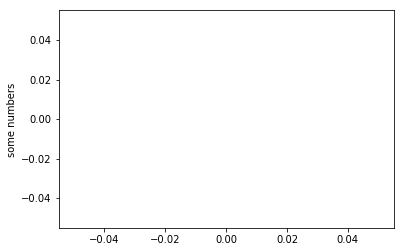

[]


In [122]:
import matplotlib.pyplot as plt
str_p_time=[]
for time in propogation_times:
    str_p_time.append(str(time))
plt.plot(str_p_time)
plt.ylabel('some numbers')
plt.show()
print(propogation_times)